/bin/bash: line 1: cd: content/: No such file or directory


In [8]:
import random
import pandas as pd
[w1,w2,w3,w4,w5,w6,w7] = [0.00781,0.00682,0.00782,0.01042,0.00782,0.00773,0.00755]
vals = []
for i in range(100000):
    x1 = random.randint(4000, 7500)
    x2 = random.randint(3,5)
    x3 = random.randint(4000,5000)
    x4 = random.randint(1,6)
    x5 = random.randint(5,10)
    x6 = random.randint(105,180)
    x7 = random.randint(65,100)
    eq = w1*x1+w2*x2+w3*x3+w4*x4+w5*x5+w6*x6+w7*x7
    vals.append([x1,x2,x3,x4,x5,x6,x7,eq])
df = pd.DataFrame(vals,columns=['MOTOR_TYPE','BATTERY_CAPACITY','BATTERY_POWER','RANGE','ACCELERATION','LOAD_CAPACITY','SATISFACTION_RATE','PERFORMANCE_RATE'])
df.to_csv('data.csv',index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ACCURACY: 0.92353587653839


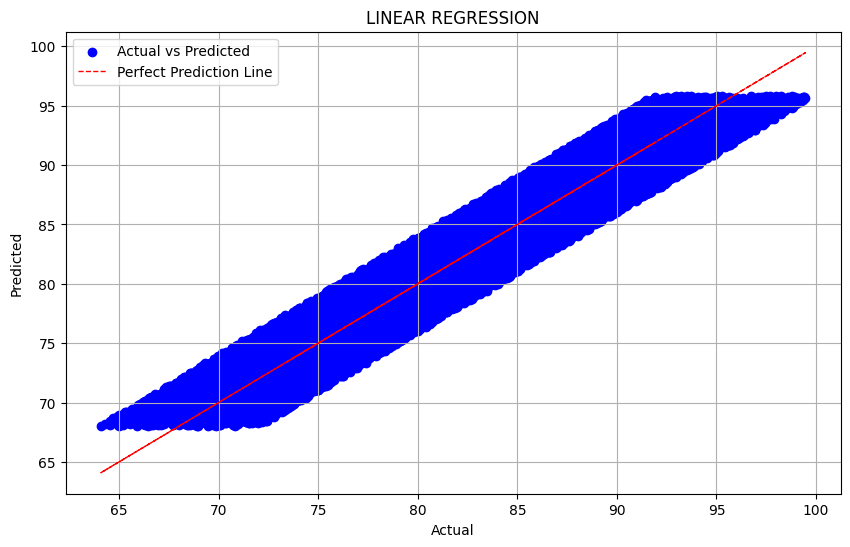

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/mini/dataset.csv'
df = pd.read_csv(file_path)

# Assuming 'feature1', 'feature2', 'feature3' are your input features
X = df[['MOTOR_TYPE', 'RANGE', 'LOAD_CAPACITY']]
y = df['PERFORMANCE_RATE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'ACCURACY: {r2}')

# Plot outputs
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linewidth=1, linestyle='--', label='Perfect Prediction Line')

plt.title('LINEAR REGRESSION')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
plt.savefig('/content/drive/My Drive/mini/plot.png')

<Figure size 640x480 with 0 Axes>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ACCURACY: 0.9235358773455611


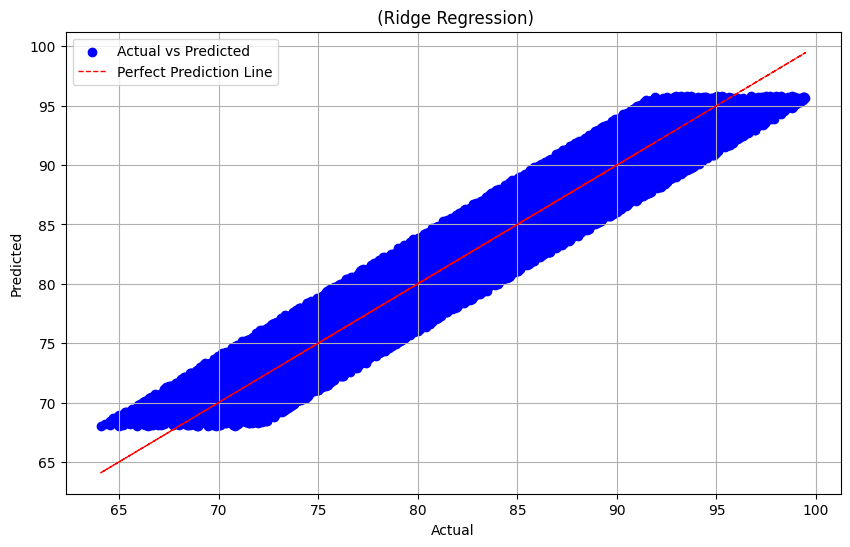

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/mini/dataset.csv'
df = pd.read_csv(file_path)

# Assuming 'feature1', 'feature2', 'feature3' are your input features and 'target' is your target variable
X = df[['MOTOR_TYPE', 'RANGE', 'LOAD_CAPACITY']]
y = df['PERFORMANCE_RATE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print(f'ACCURACY: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linewidth=1, linestyle='--', label='Perfect Prediction Line')
plt.title(' (Ridge Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error (MSE): 6.156631347671194
ACCURACY: 0.9080874051631566


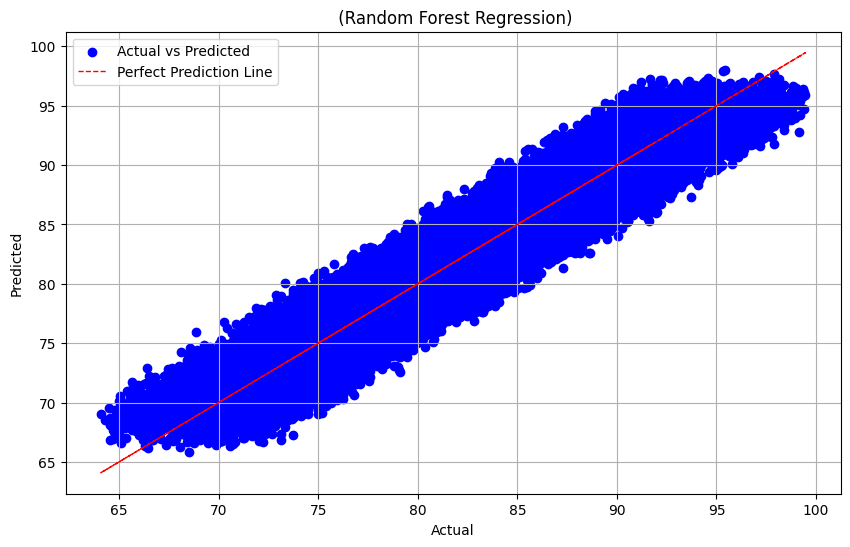

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/mini/dataset.csv'
df = pd.read_csv(file_path)

# Assuming 'feature1', 'feature2', 'feature3' are your input features and 'target' is your target variable
X = df[['MOTOR_TYPE', 'RANGE', 'LOAD_CAPACITY']]
y = df['PERFORMANCE_RATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

r2 = r2_score(y_test, y_pred)
print(f'ACCURACY: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linewidth=1, linestyle='--', label='Perfect Prediction Line')
plt.title(' (Random Forest Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error (MSE): 10.550068518377945
ACCURACY: 0.8424976064877749


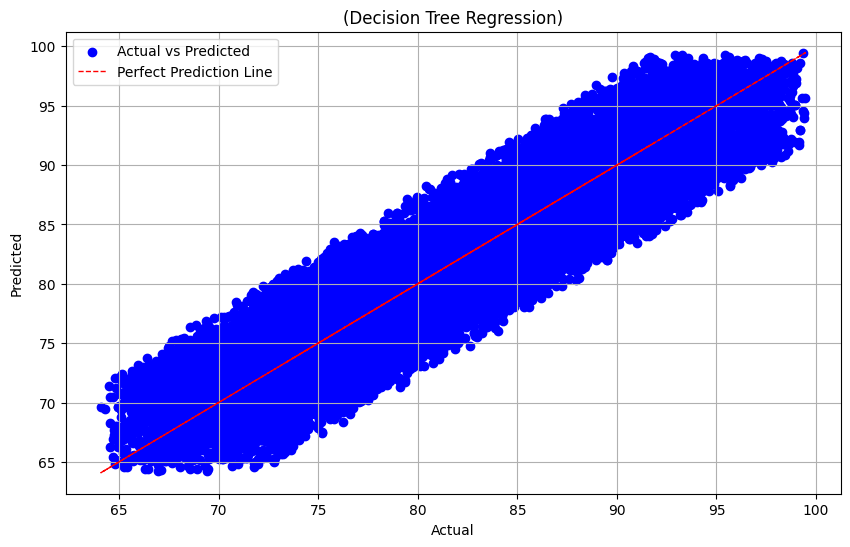

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/mini/dataset.csv'
df = pd.read_csv(file_path)

# Assuming 'feature1', 'feature2', 'feature3' are your input features and 'target' is your target variable
X = df[['MOTOR_TYPE', 'RANGE', 'LOAD_CAPACITY']]
y = df['PERFORMANCE_RATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

r2 = r2_score(y_test, y_pred)
print(f'ACCURACY: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linewidth=1, linestyle='--', label='Perfect Prediction Line')
plt.title('(Decision Tree Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()
